In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

import ast

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Found cached dataset csv (C:/Users/ADMIN/.cache/huggingface/datasets/lukebarousse___csv/lukebarousse--data_jobs-8492436fa5796c3e/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
df_VN=df[df['job_country']=='Vietnam'].dropna(subset='salary_year_avg')
job_titles=df_VN.job_title_short.value_counts().head(6).index.to_list()

In [15]:
df_VN_top6=df_VN[df_VN['job_title_short'].isin(job_titles)]
job_order=df_VN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order


Index(['Senior Data Engineer', 'Senior Data Analyst', 'Data Engineer',
       'Data Analyst', 'Data Scientist', 'Machine Learning Engineer'],
      dtype='object', name='job_title_short')

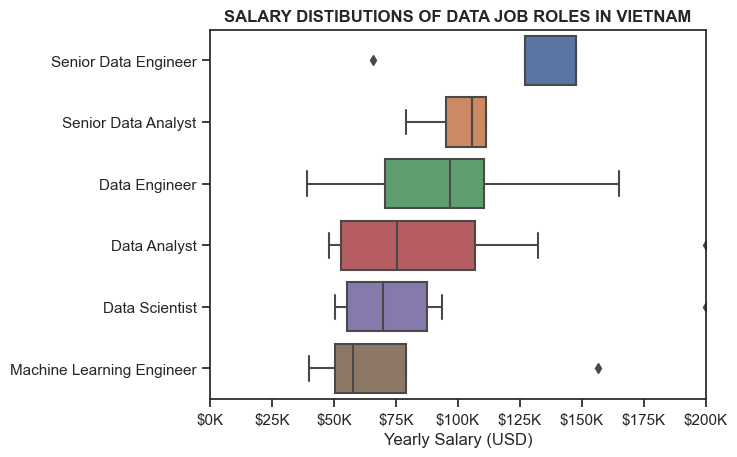

In [16]:
sns.boxplot(data=df_VN_top6, x='salary_year_avg', y='job_title_short',order=job_order)
sns.set_theme(style='ticks')
plt.title('SALARY DISTIBUTIONS OF DATA JOB ROLES IN VIETNAM',fontweight='bold' )
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 200000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()